In [206]:
from PIL import Image
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [207]:
import tensorflow as tf
import keras
from keras import Model
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.preprocessing.image import load_img,img_to_array
from keras.layers import GlobalMaxPooling2D
tf.__version__

'2.15.0'

In [208]:
imgs_path = "dataset/"
img_width, img_height = 224, 224

In [209]:
files = [imgs_path + x for x in os.listdir(imgs_path) if "jpg" in x]
print("Total number of images in dataset:",len(files))

Total number of images in dataset: 899


In [210]:
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape = (img_width, img_height, 3))
base_model.trainable = False

# Add Layer Embedding
model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d_1 (Gl  (None, 2048)              0         
 obalMaxPooling2D)                                               
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [211]:
def get_embedding(model, img_path):
    # Reshape
    img = image.load_img(img_path, target_size=(img_width, img_height))
    # img to Array
    x   = image.img_to_array(img)
    # Expand Dim (1, w, h)
    x   = np.expand_dims(x, axis=0)
    # Pre process Input
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)


In [212]:
features_imgs = []
for filename in files:
    feature_img = get_embedding(model, filename)
    features_imgs.append(feature_img)
products = pd.DataFrame(features_imgs, index=files)
test_features = get_embedding(model, 'test.jpg')


1/1 [==============================] - 0s 28ms/step


In [221]:
from sklearn.metrics.pairwise import cosine_similarity
features_imgs.append(test_features)
files.append('dataset/test_1.jpg')
products = pd.DataFrame(features_imgs, index=files)
products.index[] = np.array(test_features)
cosSimilarities = cosine_similarity(products)
cos_similarities_df = pd.DataFrame(cosSimilarities, index = files, columns = files)
cos_similarities_df.head(10)
def getID(product_path):
    index = product_path.rfind('_')
    index = product_path.rfind('_', 0, index)
    return product_path[:index]

TypeError: Index does not support mutable operations

In [215]:
def retrieve_most_similar_products(given_img, cos_similarities_df, nb_closest_images):
    print("-----------------------------------------------------------------------")
    product_name = getID(given_img)
    print("original product:", product_name)
    
    original = load_img(given_img, target_size=(img_width, img_height))
    plt.imshow(original)
    plt.show()
    print("-----------------------------------------------------------------------")
    print("most similar products:")
    closest_imgs = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+100].index
    closest_imgs_scores = cos_similarities_df[given_img].sort_values(ascending=False)[1:nb_closest_images+100]
    showed_products = []
    showed_products.append(product_name)
    i = 0
    while(len(showed_products) != nb_closest_images + 1):
        name = getID(closest_imgs[i])
        if name in showed_products:
            i+=1
            continue
        original = load_img(closest_imgs[i], target_size=(img_width, img_height))
        plt.imshow(original)
        plt.show()
        print("name: ", name)
        print("similarity score : ",closest_imgs_scores.iloc[i])
        i+=1
        showed_products.append(name)



-----------------------------------------------------------------------
original product: dataset/essentials_3-stripes_full-zip_hoodie


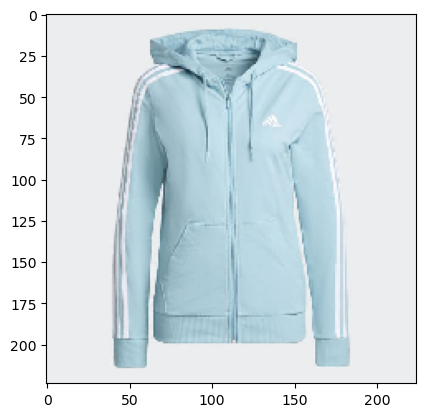

-----------------------------------------------------------------------
most similar products:


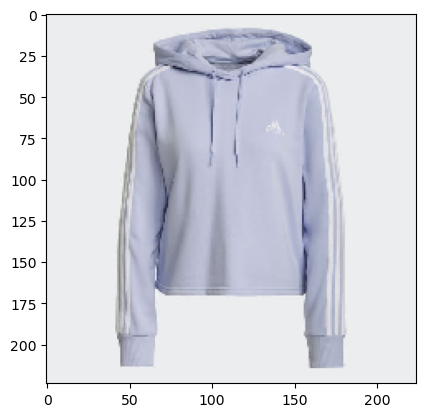

name:  dataset/essentials_3-stripes_cropped_hoodie
similarity score :  0.8452468


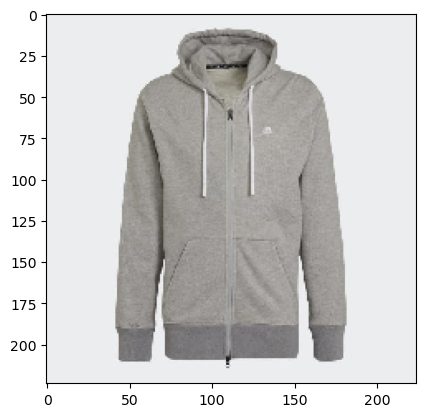

name:  dataset/adidas_sportswear_comfy_&_chill_full_zip_hoodie
similarity score :  0.78506064


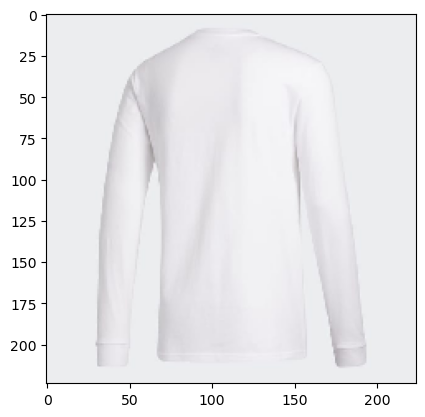

name:  dataset/badge_of_sport_tee
similarity score :  0.78452605


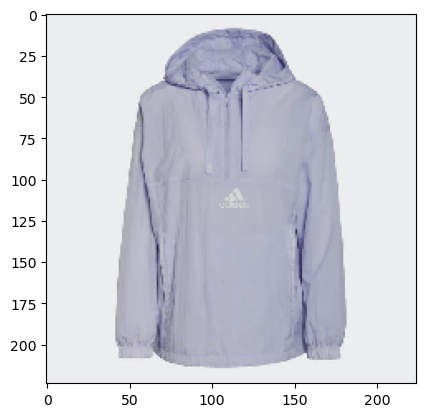

name:  dataset/brand_love_repeat_logo_half-zip_windbreaker
similarity score :  0.77922475


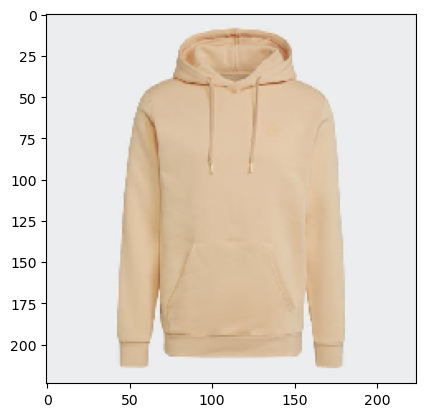

name:  dataset/adicolor_classics_mm_trefoil_hoodie
similarity score :  0.7725665


In [216]:

retrieve_most_similar_products('dataset/essentials_3-stripes_full-zip_hoodie_image_4.jpg', cos_similarities_df, 5)

In [204]:
def getX(items, products):
    result = products[products.index.isin(items)]
    return np.array(result)

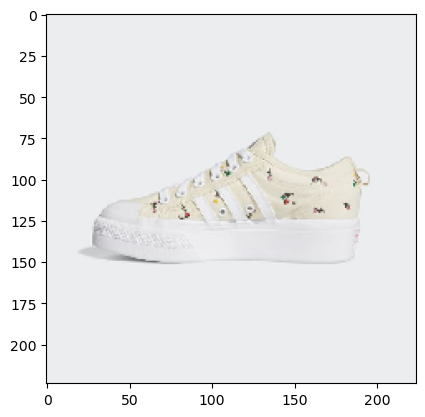

name:  dataset/techfit_tights


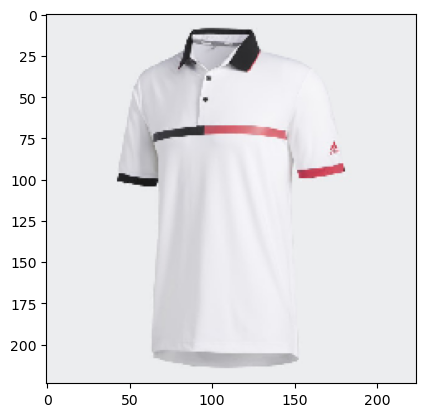

name:  dataset/techfit_tights


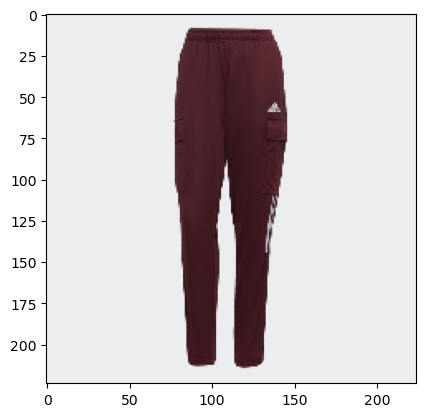

name:  dataset/techfit_tights


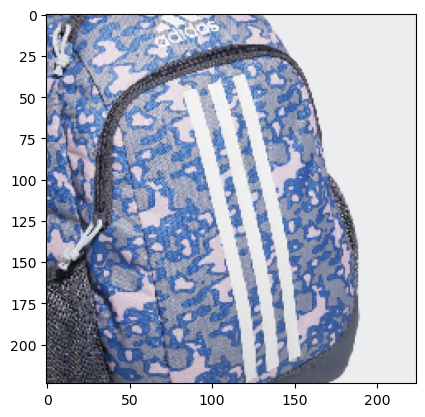

name:  dataset/techfit_tights


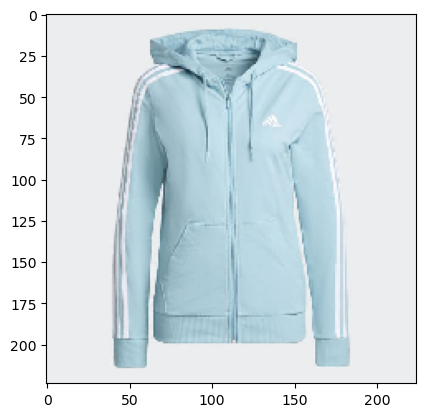

name:  dataset/techfit_tights


In [194]:
item1 = "dataset/nizza_platform_shoes_image_6.jpg"
item2 = "dataset/ultimate365_3-stripes_polo_shirt_image_6.jpg"
item3 = "dataset/tiro_cargo_pants_image_6.jpg"
item4 = "dataset/creator_backpack_image_6.jpg"
item5 = "dataset/essentials_3-stripes_full-zip_hoodie_image_4.jpg"
items = [item1, item2, item3, item4, item5]
for item in items:
    original = load_img(item, target_size=(img_width, img_height))
    plt.imshow(original)
    plt.show()
    print("name: ", name)
product_features = np.array(products)*100

In [195]:
from sklearn import linear_model

scores = np.zeros(product_features.shape[0])
indices = [products.index.get_loc(idx) for idx in items]
scores[indices] = 1
clf = linear_model.Ridge(alpha=0.01, fit_intercept  = True)
clf.fit(product_features, scores)
w = clf.coef_
b = clf.intercept_

/Users/pianokill/miniconda3/envs/tensorflow/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:239: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(


In [196]:
ratings = product_features.dot(w) + b
top_indices = np.argsort(ratings)[::-1][:100]
items = [getID(item) for item in items]
items

['dataset/nizza_platform_shoes',
 'dataset/ultimate365_3-stripes_polo_shirt',
 'dataset/tiro_cargo_pants',
 'dataset/creator_backpack',
 'dataset/essentials_3-stripes_full-zip_hoodie']

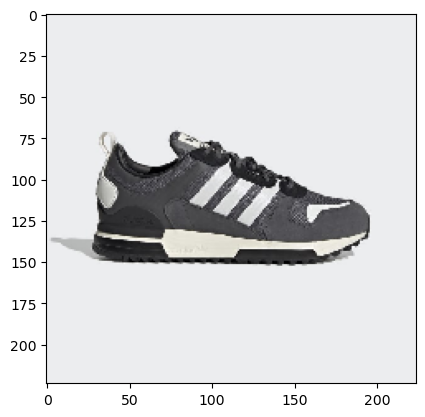

name:  dataset/zx_700_hd_shoes


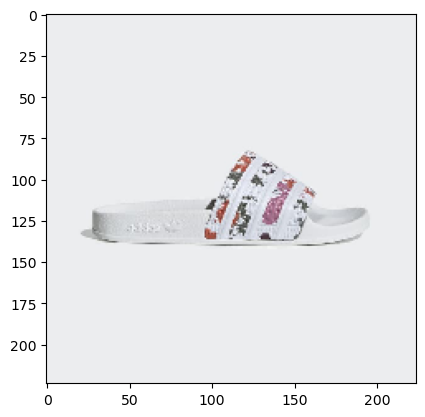

name:  dataset/adilette_slides


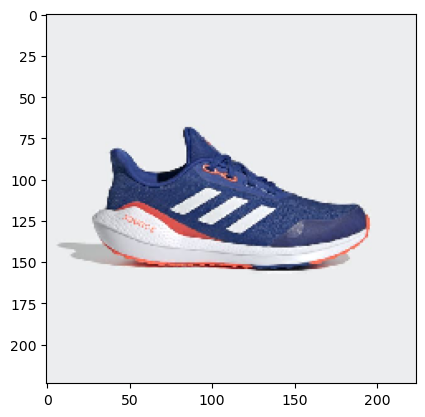

name:  dataset/eq21_run_shoes


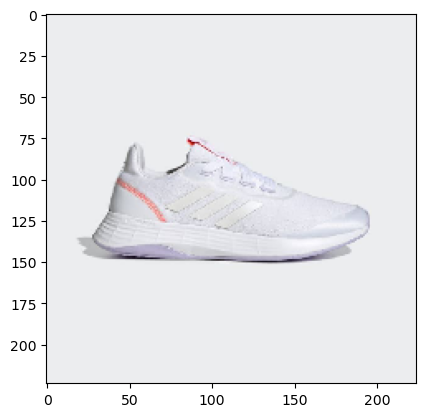

name:  dataset/qt_racer_sport_shoes


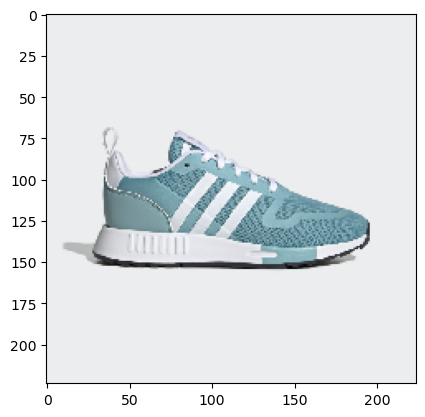

name:  dataset/multix_shoes


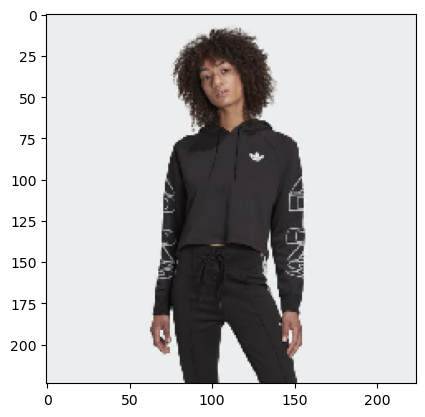

name:  dataset/cropped_letter_hoodie


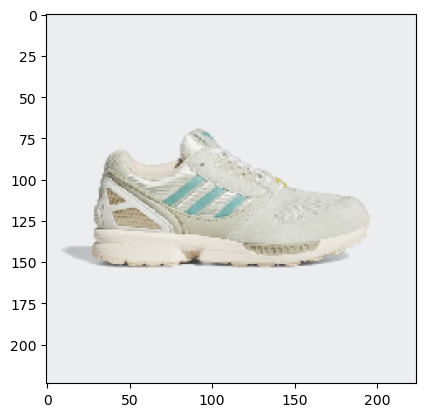

name:  dataset/zx_8000_shoes


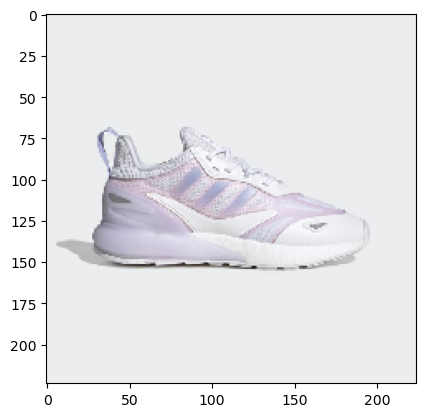

name:  dataset/zx_2k_boost_2.0_shoes


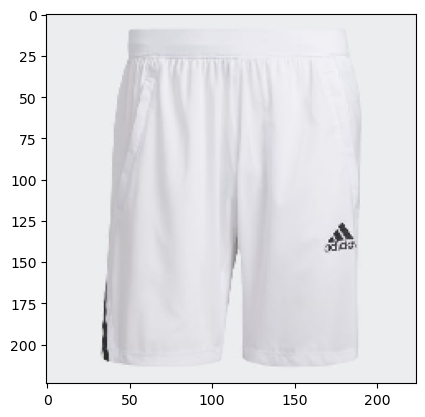

name:  dataset/aeroready_3-stripes_8-inch_shorts


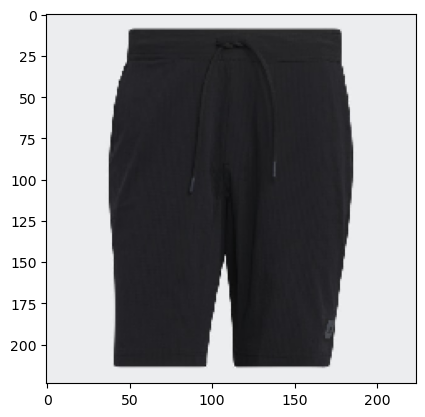

name:  dataset/adicross_hybrid_shorts


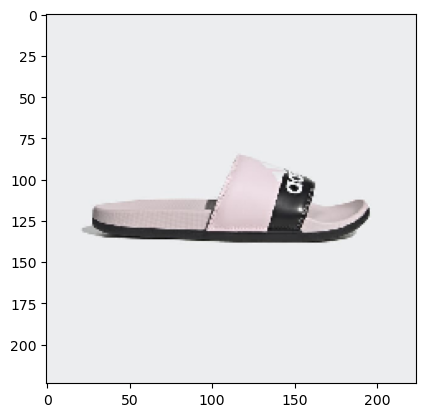

name:  dataset/adilette_comfort_sandals


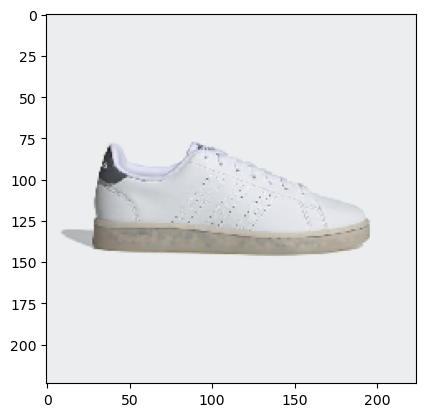

name:  dataset/advantage_eco_shoes


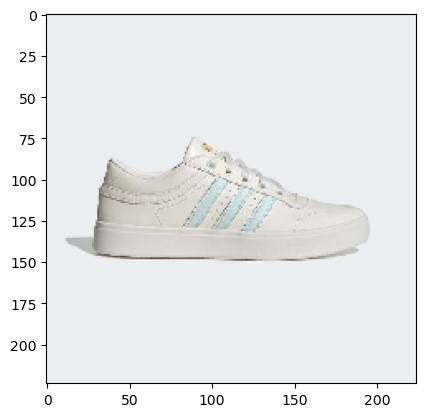

name:  dataset/bryony_shoes


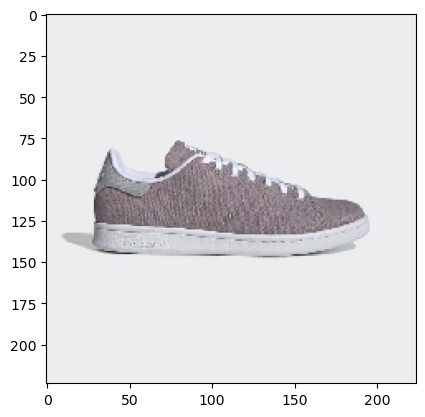

name:  dataset/stan_smith_shoes


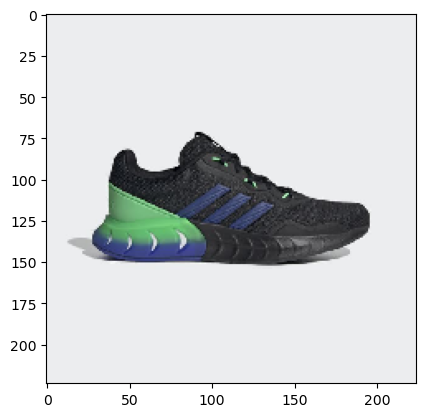

name:  dataset/kaptir_super_shoes


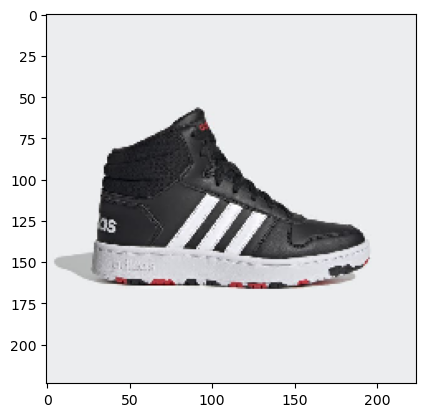

name:  dataset/hoops_2.0_mid_shoes


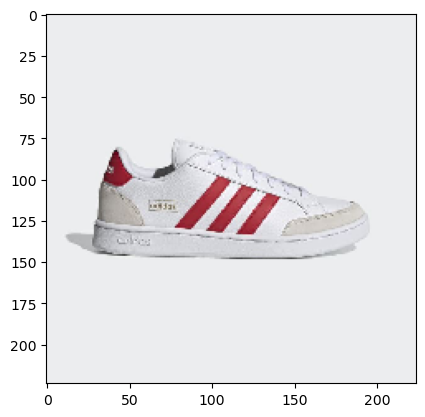

name:  dataset/grand_court_se_shoes


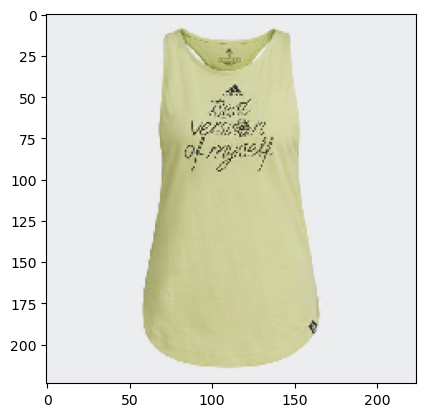

name:  dataset/best_version_of_myself_slogan_graphic_tank_top


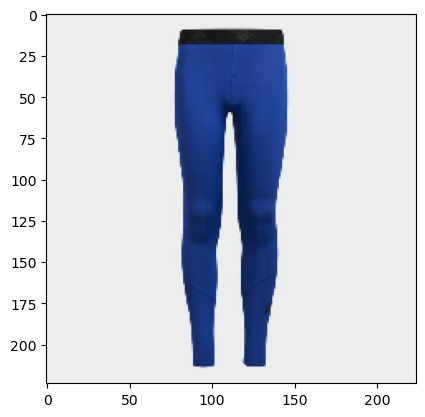

name:  dataset/techfit_tights


In [197]:
nb_closest_images = 20
i = 0
while(len(items) - 4 != nb_closest_images):
    name = getID(files[top_indices[i]])
    if name in items:
        i+=1
        continue
    if os.path.exists(name + "_image_1.jpg"):
        filename = name + "_image_1.jpg"
    else:
        filename = files[top_indices[i]]
    original = load_img(filename, target_size=(img_width, img_height))
    plt.imshow(original)
    plt.show()
    print("name: ", name)
    i+=1
    items.append(name)